# SARSA

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
from scipy.optimize import fsolve, minimize
from scipy.integrate import quad
from scipy import linspace, meshgrid, arange, empty, concatenate, newaxis, shape
from collections import deque
import nbimporter

In [2]:
from important_functions import *
from MDP_core_allocation import *
from Q_Learning import *

In [3]:
# Model parameters
lam = 2
mu = 1
cores = 10
p1 = 0.2
p2 = 0.9
alpha = 0.4
M = 10

pars = [lam, mu, cores, p1, p2, alpha, M]

## Algorithm:
## Let $(s_\text{ref}, a_\text{ref})$ be a reference state, action pair
## Start with initial state $s_0$. In step $t \geq 0$,
## Choose $a_t = \begin{cases} \arg\min_{a} Q(s_t, a) \ &\text{w.p.} \ 1-\epsilon_t \\ \text{Uniform}[0,1] \ &\text{w.p.} \ \epsilon_t \end{cases}$
## Observe immediate cost $c_t$, next state $s_{t+1}$, and also choose next action $a_{t+1}$
## $Q(s_t, a_t) \leftarrow (1-\alpha_t)Q(s_t, a_t) + \alpha_t \left( c_t - \rho_t + Q(s_{t+1}, a_{t+1}) - Q(s_\text{ref}, a_\text{ref})\right)$, where $\alpha_t$ is the learning rate
## $\rho_{t+1} = (1-\beta_t)\rho_t + \beta_t c_t$, where $\beta_t = 1/(t+1)$.

## SARSA optimal policy

In [4]:
SARSA_Q_values, SARSA_pi_optimal, SARSA_long_run_average_cost_history = SARSA_optimal_policy(pars)

# print("Optimal actions learnt from Q-learning are ")
# print(SARSA_pi_optimal)

# print("Q-values are")
# print(np.matrix.round(RL_Q_values,2))

## Bellman optimal policy

In [6]:
bellman_pi_optimal, bellman_relative_V_optimal, bellman_relative_Q_optimal = bellman_optimal_policy(pars)

# Testing
print("Optimal actions from solving bellman equation are ")
print("")
print(np.matrix.round(bellman_pi_optimal,3))

Optimal actions from solving bellman equation are 

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [1.  0.3 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [1.  0.4 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [1.  0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [1.  0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [1.  0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [1.  1.  1.  1.  1.  1.  0.4 0.3 0.2 1.  1. ]]


## Difference in SARSA and Bellman optimal policies

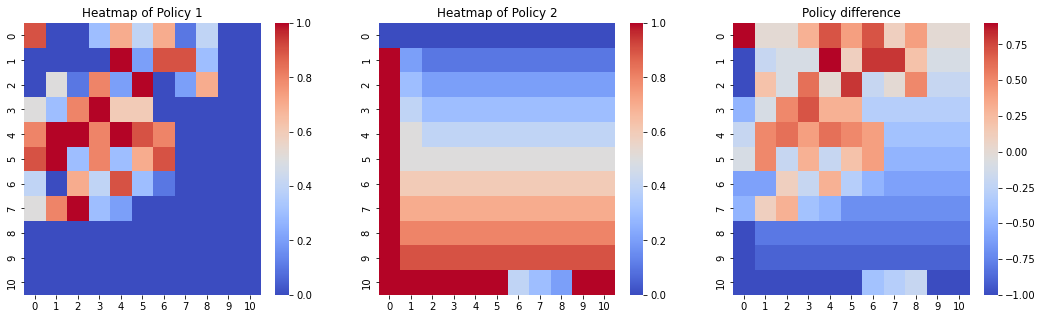

In [7]:
visualize_policies(SARSA_pi_optimal, bellman_pi_optimal)